# CS235 Fall 2025 Course Project 

Name: Sayantika Nag

Student ID:

## Introduction
In this project, a number of data mining techniques that we cover in this class will be implemented and applied to a real-world imbalanced
dataset.

**Dataset:** Wisconsin Breast Cancer Diagnostic dataset from the UCI data repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic


## Setup

1. Create new python environment for the project
2. Install the required packages

In [1]:
#%pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

## Imports

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import itertools, collections
import numpy as np
import pandas as pd

from ucimlrepo import fetch_ucirepo

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Load Data

In [5]:
# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

X

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
#X.shape, y.shape
X.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

## Exploratory Data Analysis (EDA)

### Pairwise correlation between features

* **Strong correlations** appear along diagonal bands — e.g., between:
(radius1, perimeter1, area1),(radius2, perimeter2, area2)
(radius3, perimeter3, area3).These are all **size-related features**, so it’s expected they move together.


* **Texture-related features** (texture1, texture2, texture3) show **moderate correlation**, meaning textural properties are somewhat independent of geometric size.


* **Fractal_dimension** and ***symmetry features*** tend to have low or **slightly negative correlations** with others — meaning they capture unique, less redundant information.





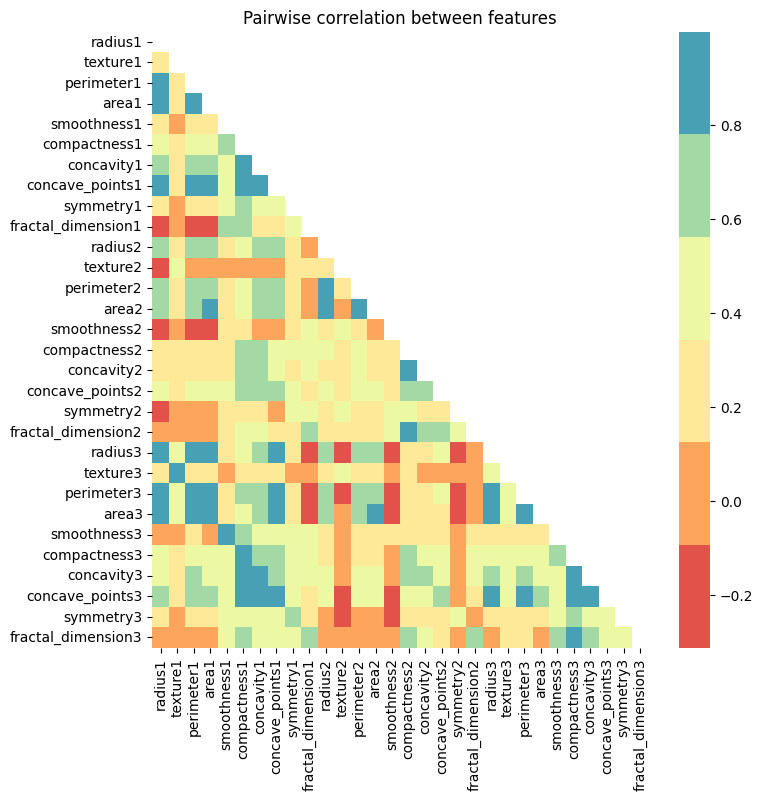

In [7]:
correlation = X.corr()

fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.heatmap(correlation, annot=False, mask=np.triu(correlation),
            cmap=sns.color_palette("Spectral"))
ax.set_title("Pairwise correlation between features")
plt.show()

In [8]:
# find the features which has high correlation:

corr_matrix = X.corr(numeric_only=True)
high_corr = np.where((corr_matrix > 0.8) & (corr_matrix < 1.0))
high_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr)]
print(high_pairs)


[('radius1', 'perimeter1'), ('radius1', 'area1'), ('radius1', 'concave_points1'), ('radius1', 'radius3'), ('radius1', 'perimeter3'), ('radius1', 'area3'), ('texture1', 'texture3'), ('perimeter1', 'radius1'), ('perimeter1', 'area1'), ('perimeter1', 'concave_points1'), ('perimeter1', 'radius3'), ('perimeter1', 'perimeter3'), ('perimeter1', 'area3'), ('area1', 'radius1'), ('area1', 'perimeter1'), ('area1', 'concave_points1'), ('area1', 'area2'), ('area1', 'radius3'), ('area1', 'perimeter3'), ('area1', 'area3'), ('smoothness1', 'smoothness3'), ('compactness1', 'concavity1'), ('compactness1', 'concave_points1'), ('compactness1', 'compactness3'), ('compactness1', 'concavity3'), ('compactness1', 'concave_points3'), ('concavity1', 'compactness1'), ('concavity1', 'concave_points1'), ('concavity1', 'concavity3'), ('concavity1', 'concave_points3'), ('concave_points1', 'radius1'), ('concave_points1', 'perimeter1'), ('concave_points1', 'area1'), ('concave_points1', 'compactness1'), ('concave_points

### Class Counts

* Benine B =357
* Malignant M=212

Thus this is an imbalanced datset

In [9]:
print(collections.Counter(y['Diagnosis']))

Counter({'B': 357, 'M': 212})


### Class-wise features distributions
**Each subplot visualizes**:

* The distribution of that feature for malignant vs. benign tumors.

* The median (center line of each box).

* The interquartile range (IQR) — the box captures the middle 50% of values.

* Whiskers and outliers — dots beyond whiskers represent extreme values.

* The dashed black line labeled “mean” shows the overall average value for that feature (across both classes).


**Summary Table of Interpretation:**

| Feature Group                                                   | Observation                   | Diagnostic Implication     |
| --------------------------------------------------------------- | ----------------------------- | -------------------------- |
| Size-related (`radius1`, `area1`, `perimeter1`)                 | Higher for malignant          | Larger, irregular cells    |
| Shape-related (`compactness1`, `concavity1`, `concave_points1`) | Higher for malignant          | More complex tumor borders |
| Texture-related (`texture1`, `smoothness1`, `symmetry1`)        | Slightly higher for malignant | More varied texture        |
| Fractal dimension                                               | Slightly higher for benign    | Smoother boundaries        |
| Error features (`radius2`, `texture2`)                          | More variable for malignant   | Less uniform structure     |

**Conclusion for this step:**
* Features like radius, area, perimeter, concavity, and concave points are most discriminative — they show clear separation between classes.

* Features like smoothness and fractal_dimension may have less predictive power individually.

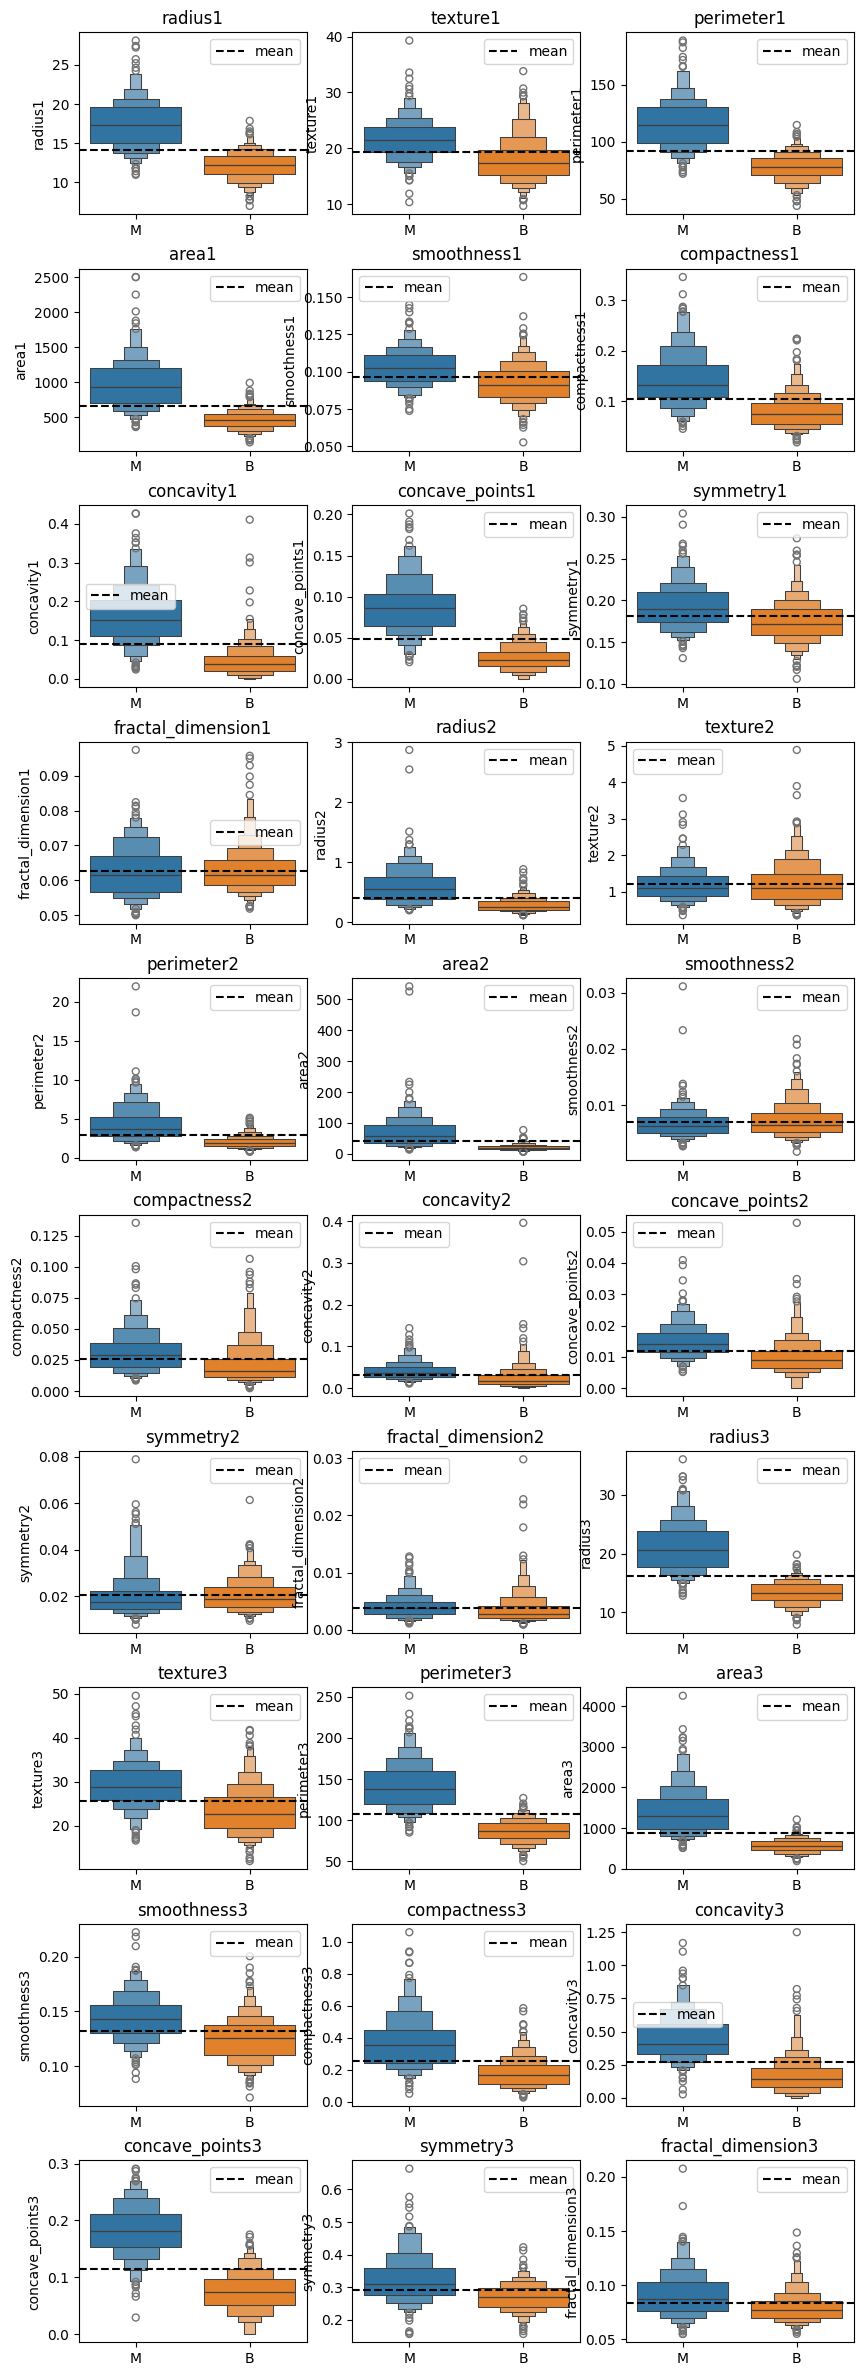

In [10]:
plt.figure(figsize=(10,30))

for i,j in itertools.zip_longest(list(X.columns), range(len(list(X.columns)))):
  plt.subplot(10,3,j+1)
  sns.boxenplot(x=y['Diagnosis'], y=X[i], hue=y['Diagnosis'])
  plt.title(i)
  plt.xlabel('')
  plt.subplots_adjust(hspace=.3)
  plt.axhline(X[i].mean(), linestyle="dashed", color='k', label='mean')
  plt.legend(loc='best')

# Phase 1 - Supervised Techniques

**Training and Test Data split**
* We used 20% of the total data set to test and 80% for training.
* For decision tree classifier we donot need to scale it, but we did anyways because we used the same dataset for the Naive_Bayes model

In [3]:
#------------------------------------
# Split the data to train the models:
#-----------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


NameError: name 'train_test_split' is not defined

## Q1 - Implementing simple classifiers

## Decision Tree Classifier

A Decision Tree classifies data by recursively splitting it based on features that maximize information gain (or equivalently, minimize impurity).

We used :

* Gini Impurity as the split criterion

* Recursive tree building

* A simple predict() function to classify new samples

In [ ]:
#----------------------------------
# Step 1: Define Helper Functions
#-----------------------------------

def gini(y):
    """
    Compute the Gini impurity of a label array.
    Formula: Gini = 1 - Σ(p_i)^2, where p_i is the proportion of class i.
    """
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    gini_impurity = 1 - np.sum(probabilities ** 2)
    return gini_impurity

def information_gain(y, y_left, y_right):
    """
    Calculate the information gain from a potential split.
    IG = Gini(parent) - weighted average of Gini(children)
    weight = (n_left / n) * Gini(left) + (n_right / n) * Gini(right)
    y= parent, y_left=left child, y_right=right child
    """
    n = len(y)
    # If either child is empty, no valid split
    if len(y_left) == 0 or len(y_right) == 0:
        return 0

    parent_gini_index = gini(y)
    weighted_gini_children = (len(y_left) / n) * gini(y_left) + (len(y_right) / n) * gini(y_right)
    gain = parent_gini_index - weighted_gini_children
    return gain

#-------------------------------------
# Step 2: Create the Node Structure
#-------------------------------------
class Node:
    """
    Represents a node in the Decision Tree.
    A node can either be:
    - an internal node (has feature_index, threshold, left, right), or
    - a leaf node (has only a value).
    """
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index  # Which feature is used for this split and node making
        self.threshold = threshold          # The numeric threshold for that feature
        self.left = left                    # Left child node (values <= threshold)
        self.right = right                  # Right child node (values > threshold)
        self.value = value                  # If it is a leaf, the predicted class label

# -----------------------------
# Step 3:Define the Decision Tree class
# -----------------------------
class Decision_Tree:
    """
    A simple Decision Tree Classifier built from scratch.
    Supports binary classification and uses Gini impurity for splits.
    Does the whole thing -- training, building and prediction
    """

    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        """
        Public method to train the tree.
        Calls the _build_tree() function to build the tree.
        """
        #print(" Starting to build the Decision Tree...\n")
        self.root = self._build_tree(X, y)
        #print(" Decision Tree built successfully!\n")

    def _build_tree(self, X, y, depth=0):
        """
        Recursively build the tree by finding the best split at each step.
        """
        n_samples, n_features = X.shape
        unique_classes = np.unique(y)

        # Base case: stop splitting if stopping conditions are met
        if (depth >= self.max_depth) or (len(unique_classes) == 1) or (n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            #print(f"{'|   ' * depth} Leaf Node created at depth {depth}: class = {leaf_value}")
            return Node(value=leaf_value)

        best_gain = -1  # track best information gain
        split_idx, split_thresh = None, None

        # Try every feature and every possible threshold
        for feature_idx in range(n_features):
            thresholds = np.unique(X[:, feature_idx])
            for t in thresholds:
                left_idx = X[:, feature_idx] <= t
                right_idx = X[:, feature_idx] > t

                if len(y[left_idx]) == 0 or len(y[right_idx]) == 0:
                    continue  # skip invalid splits

                gain = information_gain(y, y[left_idx], y[right_idx])

                # Keep track of the split with the highest gain
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_idx
                    split_thresh = t

        # If no split improves gain, make this a leaf node
        if best_gain == -1:
            leaf_value = self._most_common_label(y)
            #print(f"{'|   ' * depth}Leaf Node created at depth {depth}: class = {leaf_value}")
            return Node(value=leaf_value)

        # Print info about the current split
        #print(f"{'|   ' * depth}Depth {depth}: Split on feature[{split_idx}] <= {split_thresh:.3f} (Gain = {best_gain:.4f})")

        # Split the data and recursively build left and right subtrees
        left_idx = X[:, split_idx] <= split_thresh
        right_idx = X[:, split_idx] > split_thresh
        left_subtree = self._build_tree(X[left_idx], y[left_idx], depth + 1)
        right_subtree = self._build_tree(X[right_idx], y[right_idx], depth + 1)

        # After recursion, print confirmation for this internal node
        #print(f"{'|   ' * depth} Returning to depth {depth} (feature[{split_idx}] <= {split_thresh:.3f})")


        # Return a new internal node with children
        return Node(feature_index=split_idx, threshold=split_thresh, left=left_subtree, right=right_subtree)

    def _most_common_label(self, y):
        """Return the most frequent class label in an array."""
        values, counts = np.unique(y, return_counts=True)
        return values[np.argmax(counts)]

    #---------------
    # Prediction step
    #----------------
    def predict(self, X):
        """Predict labels for a batch of samples."""
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        """
        Recursively travel down the tree to make a prediction for a single sample.
        """
        # Base case: if leaf node, return its value
        if node.value is not None:
            return node.value

        # Go left or right based on the feature threshold
        if x[node.feature_index] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)



In [ ]:
#------------------
# Train the decision tree
#-----------------------

decision_tree_model = Decision_Tree(max_depth=5, min_samples_split=2)
decision_tree_model.fit(X_train, y_train)



In [ ]:
# -------------------------------
# Predict and Check classification report
#--------------------------------

y_test_pred_dt = decision_tree_model.predict(X_test)
y_train_pred_dt = decision_tree_model.predict(X_train)

# Print accuracy
print("Accuracy test set:", accuracy_score(y_test, y_test_pred_dt))
print("Accuracy train set:", accuracy_score(y_train,y_train_pred_dt))

# Print full classification report
print("\nClassification Report on test set:\n")
print(classification_report(y_test, y_test_pred_dt))

Accuracy test set: 0.9298245614035088
Accuracy train set: 0.9956043956043956

Classification Report on test set:

              precision    recall  f1-score   support

           B       0.96      0.93      0.94        71
           M       0.89      0.93      0.91        43

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [ ]:

#---------------------------------------------------------------
# Gaussian Naive Bayes Classifier
#---------------------------------------------------------------
class Gaussian_Naive_Bayes:
    def fit(self, X, y):
        """
        Fit the Gaussian Naive Bayes model.
        - Compute mean, variance, and prior for each class.
        """
        self.classes = np.unique(y)
        n_features = X.shape[1]
        y = np.ravel(y)  # ensure y is a 1D vector

        # Initialize mean, var, and prior
        self.mean = np.zeros((len(self.classes), n_features))
        self.var = np.zeros((len(self.classes), n_features))
        self.priors = np.zeros(len(self.classes))

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / X.shape[0]


    def _gaussian_pdf(self, class_idx, x):
        """
        Compute the probability density for feature values given a class.
        """
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def _predict_single(self, x):
        """
        Predict the class for a single data point.
        """
        posteriors = []

        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            class_conditional = np.sum(np.log(self._gaussian_pdf(idx, x)))
            posterior = prior + class_conditional
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        """
        Predict class labels for the entire dataset.
        """
        return np.array([self._predict_single(x) for x in X])



In [ ]:
#---------------------------------------------------------------
# Train and evaluate
#---------------------------------------------------------------
gaussian_nb_model = Gaussian_Naive_Bayes()
gaussian_nb_model.fit(X_train, y_train)
y_test_pred_nb = gaussian_nb_model.predict(X_test)

print("Accuracy Test Set:", accuracy_score(y_test, y_test_pred_nb))
print("\nClassification Report Test Set:\n", classification_report(y_test, y_test_pred_nb))

Accuracy Test Set: 0.9649122807017544

Classification Report Test Set:
               precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



/Users/sayantikanag/Documents/Code/python/data_sc/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


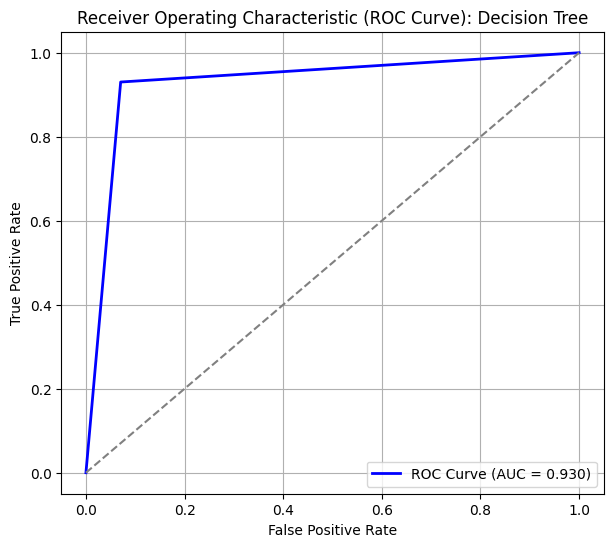

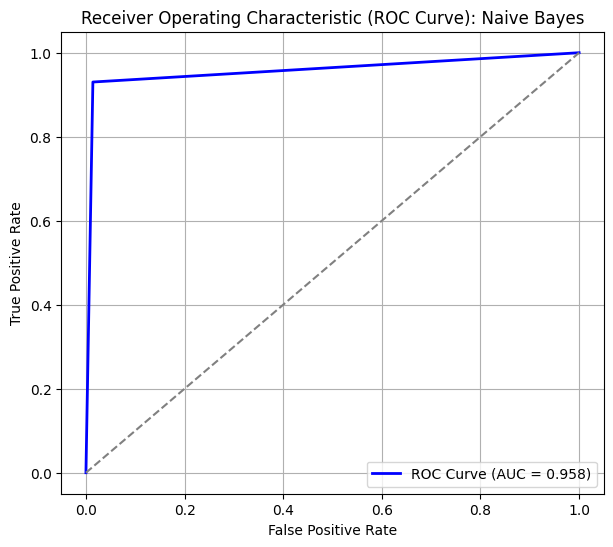

In [ ]:
# [YOUR PLOTTING CODE HERE]
#-----------------------------------
# ROC curve Decision tree and NAive Bayes:
#-----------------------------------
from sklearn.preprocessing import LabelEncoder

# since the result is not 0 or 1 we encode it:
label_encoder = LabelEncoder() # Create an instance of LabelEncoder
y_test_enc = label_encoder.fit_transform(y_test)
y_test_pred_dt_enc = label_encoder.transform(y_test_pred_dt)
y_test_pred_nb_enc = label_encoder.transform(y_test_pred_nb)


# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_enc, y_test_pred_dt_enc)
roc_auc = roc_auc_score(y_test_enc, y_test_pred_dt_enc)

# Plot ROC curve
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve): Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_enc, y_test_pred_nb_enc)
roc_auc = roc_auc_score(y_test_enc, y_test_pred_nb_enc)

# Plot ROC curve
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve): Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

#-------------------------------------------
# 10-Fold (n_splits) Cross-Validation for our models
#-------------------------------------------
def cross_val_f1(model_class, X, y, n_splits=10):
    """
    Performs stratified k-fold cross-validation for a custom model class.

    Parameters:
        model_class: the class (not instance) of my model, e.g. Gaussian_Naive_Bayes
        X: features
        y: labels
        n_splits: number of folds (default 10)

    Returns:
        f1_scores: list of F1-scores across folds
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    f1_scores = []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = model_class()
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)

        print(f"Fold {fold+1} F1 Score: {f1:.4f}")
    
    print("Average F1 Score: {:.4f} ± {:.4f} \n ".format(np.mean(f1_scores), np.std(f1_scores)))
    return f1_scores


#-------------------------------------------
# Run cross-validation for two models
#-------------------------------------------
X1=np.array(X)
y1=label_encoder.fit_transform(y)
f1_scores_nb = cross_val_f1(Gaussian_Naive_Bayes, X1, y1)
f1_scores_dt = cross_val_f1(Decision_Tree, X1, y1)


Fold 1 F1 Score: 0.9767
Fold 2 F1 Score: 0.9333
Fold 3 F1 Score: 0.9048
Fold 4 F1 Score: 0.8421
Fold 5 F1 Score: 0.9268
Fold 6 F1 Score: 0.8649
Fold 7 F1 Score: 0.8837
Fold 8 F1 Score: 0.8750
Fold 9 F1 Score: 0.8780
Fold 10 F1 Score: 0.9756
Average F1 Score: 0.9061 ± 0.0436 
 


/Users/sayantikanag/Documents/Code/python/data_sc/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/vx/3fzp6wgj3hjddg4k8wfsymj80000gn/T/ipykernel_5083/3150484385.py:44: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(self._gaussian_pdf(idx, x)))
/var/folders/vx/3fzp6wgj3hjddg4k8wfsymj80000gn/T/ipykernel_5083/3150484385.py:44: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(self._gaussian_pdf(idx, x)))


Fold 1 F1 Score: 0.8936
Fold 2 F1 Score: 0.9048
Fold 3 F1 Score: 0.8571
Fold 4 F1 Score: 0.8108
Fold 5 F1 Score: 0.8636
Fold 6 F1 Score: 0.9756
Fold 7 F1 Score: 0.9091
Fold 8 F1 Score: 0.8936
Fold 9 F1 Score: 0.9231
Fold 10 F1 Score: 0.9767
Average F1 Score: 0.9008 ± 0.0484 
 


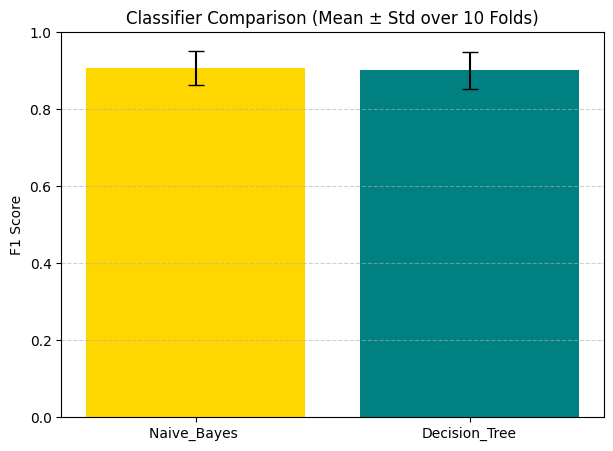

In [ ]:

#---------------
# Bar plot comparsion of the f1 scores
#-------------------

# Model names and results
models = ['Naive_Bayes ', 'Decision_Tree']
means = [np.mean(f1_scores_nb), np.mean(f1_scores_dt)]
stds = [np.std(f1_scores_nb), np.std(f1_scores_dt)]

# Plot
plt.figure(figsize=(7,5))
plt.bar(models, means, yerr=stds, capsize=6, color=['gold', 'teal'])
plt.ylabel("F1 Score")
plt.title("Classifier Comparison (Mean ± Std over 10 Folds)")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


## Q2 - Dimensionality reduction with the Singular Value Decomposition

* First, I centered the data by subtracting the mean of each feature to remove bias. Then I computed the matrix [trans(X).X] and performed an eigen-decomposition to obtain eigenvalues and eigenvectors. The square roots of the eigenvalues give the singular values, while the corresponding eigenvectors form the right singular vectors (V).

* I computed the left singular vectors (U)

* I performed dimensionality reduction by keeping only the top-k singular values and corresponding vectors, which capture most of the variance in the data. Finally, I used an elbow plot of cumulative explained variance to determine the optimal number of components (k) that preserve about 95% of the total variance.

In [ ]:
# [YOUR IMPLEMENTATION CODE HERE]

#---------------------------------------------------------------
# Step 1: Center the data
#---------------------------------------------------------------
def center_data(X):
    """
    Centers the dataset by subtracting the mean of each feature.

    Parameters:
        X (numpy.ndarray): The original data matrix (m x n),
                           where m = number of samples, n = number of features.

    Returns:
        X_centered (numpy.ndarray): Mean-centered data.
        mean_vector (numpy.ndarray): Mean of each column (feature).
    """
    mean_vector = np.mean(X, axis=0)
    X_centered = X - mean_vector
    return X_centered, mean_vector


#---------------------------------------------------------------
# Step 2: Compute X^T * X (covariance-like matrix)
#---------------------------------------------------------------
def compute_xtx(X_centered):
    """
    Computes the matrix X^T * X.
    This matrix captures relationships between features (not samples).

    Parameters:
        X_centered (numpy.ndarray): Mean-centered data (m x n)

    Returns:
        XTX (numpy.ndarray): The matrix product X^T * X (n x n)
    """
    XTX = np.dot(X_centered.T, X_centered)
    return XTX


#---------------------------------------------------------------
# Step 3: Eigen-decomposition of X^T * X
#---------------------------------------------------------------
def compute_eigendecomposition(XTX):
    """
    Computes eigenvalues and eigenvectors of X^T * X.

    - The eigenvectors represent the principal directions (V)
    - The eigenvalues represent the strength of each direction.

    Parameters:
        XTX (numpy.ndarray): (n x n) matrix

    Returns:
        eigvals (numpy.ndarray): Sorted eigenvalues (descending)
        eigvecs (numpy.ndarray): Corresponding eigenvectors
    """
    eigvals, eigvecs = np.linalg.eig(XTX)

    # Sort eigenvalues in descending order
    sorted_idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_idx]
    eigvecs = eigvecs[:, sorted_idx]

    return eigvals, eigvecs


#---------------------------------------------------------------
# Step 4: Construct U, Σ, and V^T manually
#---------------------------------------------------------------
def compute_svd(X_centered):
    """
    Performs Singular Value Decomposition manually.

    Formula: X = U Σ V^T
    where:
        - U: Left singular vectors (m x m)
        - Σ: Diagonal matrix of singular values (m x n)
        - V^T: Right singular vectors (n x n)

    Parameters:
        X_centered (numpy.ndarray): Mean-centered data

    Returns:
        U, Σ, V^T (tuple of numpy.ndarray)
    """
    # Step 4.1: Compute eigenvalues and eigenvectors
    XTX = compute_xtx(X_centered)
    eigvals, V = compute_eigendecomposition(XTX)

    # Step 4.2: Singular values = sqrt of eigenvalues
    singular_values = np.sqrt(np.abs(eigvals))

    # Step 4.3: Compute U using the formula U = X * V / singular_value
    # This ensures U's columns are orthonormal
    U = np.dot(X_centered, V)
    U = U / singular_values

    # Step 4.4: Construct Σ (diagonal matrix of singular values)
    Sigma = np.zeros_like(X_centered, dtype=float)
    np.fill_diagonal(Sigma, singular_values)

    # Step 4.5: Compute V^T (transpose of V)
    VT = V.T

    return U, Sigma, VT


#---------------------------------------------------------------
# Step 5: Dimensionality Reduction
#---------------------------------------------------------------
def reduce_dimensions(X, k):
    """
    Reduces data to k dimensions using the top k singular values/vectors.

    Parameters:
        X (numpy.ndarray): Original data matrix
        k (int): Number of dimensions to keep

    Returns:
        X_reduced (numpy.ndarray): Reduced data representation
        U_k, Sigma_k, V_k^T: Reduced SVD components
    """
    X_centered, mean_vector = center_data(X)
    U, Sigma, VT = compute_svd(X_centered)

    # Keep only top-k components
    U_k = U[:, :k]
    Sigma_k = Sigma[:k, :k]
    VT_k = VT[:k, :]

    # Project data into reduced space
    X_reduced = np.dot(U_k, Sigma_k)

    return X_reduced, U_k, Sigma_k, VT_k, mean_vector

#---------------------------------------------------------------
# Step 6: Elbow Plot to find optimal dimensions
#---------------------------------------------------------------
def svd_elbow_plot(X):
    """Plot cumulative explained variance to choose the optimal k."""
    X_centered, _ = center_data(X)
    XTX = compute_xtx(X_centered)
    eigvals, _ = compute_eigendecomposition(XTX)
    singular_values = np.sqrt(np.abs(eigvals))

    explained_variance = (singular_values**2) / np.sum(singular_values**2)
    cumulative_variance = np.cumsum(explained_variance)

    plt.figure(figsize=(8,6))
    plt.plot(range(1, len(singular_values)+1), cumulative_variance, marker='o', color='b')
    plt.title("Elbow Plot for SVD (Explained Variance)")
    plt.xlabel("Number of Components (k)")
    plt.ylabel("Cumulative Explained Variance")
    plt.grid(True)
    plt.show()

    k_opt = np.argmax(cumulative_variance >= 0.95) + 1
    print(f"Components needed for 95% variance: k = {k_opt}")
    return k_opt



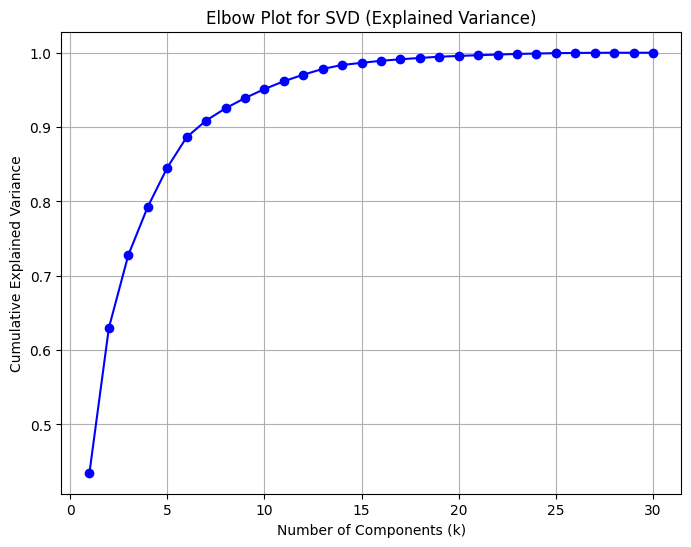

Components needed for 95% variance: k = 10
Reduced dimensions: 30 → 10


In [ ]:
k_optimal = svd_elbow_plot(X_train)
X_train_reduced, U_k, Sigma_k, VT_k, mean_vector = reduce_dimensions(X_train, k_optimal)
X_test_centered = X_test - mean_vector
X_test_reduced = np.dot(X_test_centered, VT_k.T)

print(f"Reduced dimensions: {X_train.shape[1]} → {X_train_reduced.shape[1]}")


**Evaluation on Reduced dataset**

In [ ]:
# Refit Decision Tree model on SVD-reduced data
decision_tree_model.fit(X_train_reduced, y_train)
# Predict on reduced test data
y_test_pred = decision_tree_model.predict(X_test_reduced)

# Evaluate:
print("model: Decision Tree")
print("Accuracy on reduced data (Test Data):", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))

print("------------------")

# Refit NB model on SVD-reduced data
gaussian_nb_model.fit(X_train_reduced, y_train)
# Predict on reduced test data
y_test_pred = gaussian_nb_model.predict(X_test_reduced)
# Evaluate:
print("model: Gaussian Naive Bayes")
print("Accuracy on reduced data (Test Data):", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))


model: Decision Tree
Accuracy on reduced data (Test Data): 0.9385964912280702

Classification Report (Test Data):
               precision    recall  f1-score   support

           B       0.96      0.94      0.95        71
           M       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

------------------
model: Gaussian Naive Bayes
Accuracy on reduced data (Test Data): 0.9210526315789473

Classification Report (Test Data):
               precision    recall  f1-score   support

           B       0.91      0.97      0.94        71
           M       0.95      0.84      0.89        43

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



Fold 1 F1 Score: 0.8000
Fold 2 F1 Score: 0.8889
Fold 3 F1 Score: 0.8889
Fold 4 F1 Score: 1.0000
Fold 5 F1 Score: 0.8889
Fold 6 F1 Score: 0.8571
Fold 7 F1 Score: 1.0000
Fold 8 F1 Score: 0.8571
Fold 9 F1 Score: 1.0000
Fold 10 F1 Score: 0.8889
Average F1 Score: 0.9070 ± 0.0661 
 
Fold 1 F1 Score: 0.6667
Fold 2 F1 Score: 0.9091


/Users/sayantikanag/Documents/Code/python/data_sc/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 F1 Score: 0.8889
Fold 4 F1 Score: 1.0000
Fold 5 F1 Score: 1.0000
Fold 6 F1 Score: 0.6667
Fold 7 F1 Score: 1.0000
Fold 8 F1 Score: 1.0000
Fold 9 F1 Score: 0.8571
Fold 10 F1 Score: 0.8889
Average F1 Score: 0.8877 ± 0.1223 
 
mean F1 scores : [NB, DT] [np.float64(0.906984126984127), np.float64(0.8877344877344877)] 


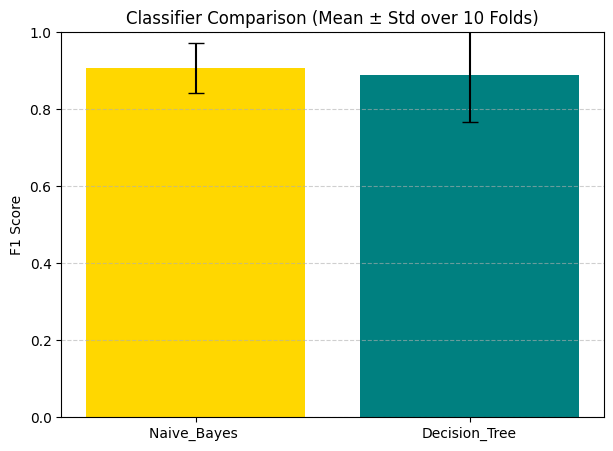

In [ ]:
#-------------------------------------------
# Run cross-validation for two models
#-------------------------------------------
X1=np.array(X_test_reduced)
y1=label_encoder.fit_transform(y_test)
f1_scores_nb = cross_val_f1(Gaussian_Naive_Bayes, X1, y1)
f1_scores_dt = cross_val_f1(Decision_Tree, X1, y1)

#---------------
# Bar plot comparsion of the f1 scores
#-------------------

# Model names and results
models = ['Naive_Bayes ', 'Decision_Tree']
means = [np.mean(f1_scores_nb), np.mean(f1_scores_dt)]
stds = [np.std(f1_scores_nb), np.std(f1_scores_dt)]
print(f"mean F1 scores : [NB, DT] {means} ")
# Plot
plt.figure(figsize=(7,5))
plt.bar(models, means, yerr=stds, capsize=6, color=['gold', 'teal'])
plt.ylabel("F1 Score")
plt.title("Classifier Comparison (Mean ± Std over 10 Folds)")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## Q3 - Feature selection with randomization

**Feature Randomization via Permutation** 
* we are measuring how important is each feature for a trained model, by intentially scrambling one feature and checking how much the model performance drops.
* If the model performance doesnot change much -> feature is not important


**Steps**
  * 1. We start with an already trained model
  * 2. We calculate how well in performs over the validation set(holdout set) with all features included -> this gives us BASELINE measure (eg 90%)
  * 3. Pick one feature (say feature_i) : DO ->
      * We shuffle the columns values of feature_i randomly
      * All the other column values remain the exact
  * 4. Compute the performance again with the new-shuffled data, say now the performance is 85%
  * 5. Compute the feature importance via performance drop : 
      * This would imply the performance drop for feature _i is 90%-85% = 5% -> feature_i is important for the model
  * 6. Repeat this for each feature column

In [ ]:
#----------------------------------------------
# Step 0: Data preparation
#----------------------------------------------
# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Get feature names
try:
    feature_names = list(breast_cancer_wisconsin_diagnostic.data.feature_names)
except:
    # fallback: generic names if metadata missing
    feature_names = [f"Feature_{i}" for i in range(X.shape[1])]

print(f"Feature count: {len(feature_names)}")
print(f"Unique target values: {np.unique(y)}")


Feature count: 30
Unique target values: ['B' 'M']


In [ ]:


#-----------------------------------------------------------
# Step 1: Split into feature selection and holdout data
#-----------------------------------------------------------
# 20% of data → feature selection, 80% → holdout 
X_fs, X_holdout, y_fs, y_holdout = train_test_split(
    X, y, test_size=0.8, stratify=y, random_state=42
)

print("Feature Selection sample:", X_fs.shape)
print("Holdout (evaluation) data:", X_holdout.shape)

#-----------------------------------------------------------
# Step 2: Define Randomization-based Feature Importance Function
#-----------------------------------------------------------
def feature_importance_randomization(model_class, X, y, feature_names, n_splits=5, pos_label='M'):
    """
    Calculates feature importance using randomization-based analysis.

    For each feature:
    - Randomly shuffle that feature to destroy its information
    - Measure model performance drop compared to baseline F1

    Args:
        model_class: the model class (Decision_Tree or Gaussian_Naive_Bayes)
        X: feature matrix
        y: labels
        feature_names: list of feature names
        n_splits: number of cross-validation folds
        pos_label: positive class for F1 metric

    Returns:
        base_f1 (float): baseline F1 score (no randomization)
        randomized_f1 (np.array): F1 scores after shuffling each feature
        performance_drop (np.array): percentage drop in F1 per feature
    """
    n_features = X.shape[1]
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # ---------- Compute Baseline Model Performance ----------
    base_scores = []
    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = model_class()  # instantiate model
        model.fit(X_train, y_train)  # train normally over the original data
        y_pred = model.predict(X_test)
        base_scores.append(f1_score(y_test, y_pred, pos_label=pos_label))

    base_f1 = np.mean(base_scores)
    print(f"\nBaseline F1 ({model_class.__name__}): {base_f1:.3f}")

    # ---------- Evaluate Each Feature by Randomization ----------
    randomized_f1 = np.zeros(n_features)
    for i in range(n_features):
        f1_scores = []
        for train_idx, test_idx in skf.split(X, y):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            # Make a copy of test data and shuffle only one column (feature i)
            X_test_rand = X_test.copy()
            np.random.shuffle(X_test_rand[:, i])  # destroys info in feature i

            # Train model and evaluate on randomized data
            model = model_class()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test_rand)
            f1_scores.append(f1_score(y_test, y_pred, pos_label=pos_label))

        # Store mean F1 score after randomizing this feature
        randomized_f1[i] = np.mean(f1_scores)

    # ---------- Calculate % Performance Drop ----------
    performance_drop = (base_f1 - randomized_f1) / base_f1 * 100
    return base_f1, randomized_f1, performance_drop


#-----------------------------------------------------------
# Step 3: Run for both custom models:
#-----------------------------------------------------------
base_nb, rand_nb, drop_nb = feature_importance_randomization(Gaussian_Naive_Bayes, X_fs, y_fs, feature_names)
base_dt, rand_dt, drop_dt = feature_importance_randomization(Decision_Tree, X_fs, y_fs, feature_names)



Feature Selection sample: (113, 30)
Holdout (evaluation) data: (456, 30)

Baseline F1 (Gaussian_Naive_Bayes): 0.890

Baseline F1 (Decision_Tree): 0.851


In [ ]:

#-----------------------------------------------------------
# Step 4: Create and Display Feature Importance Table
#-----------------------------------------------------------

# Create a DataFrame comparing both models
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'NaiveBayes_Drop(%)': drop_nb,
    'DecisionTree_Drop(%)': drop_dt
})

# Compute average drop across both models (optional metric)
importance_df['Average_Importance(%)'] = importance_df[['NaiveBayes_Drop(%)', 'DecisionTree_Drop(%)']].mean(axis=1)

# Sort by average importance descending
importance_df_sorted = importance_df.sort_values(by='Average_Importance(%)', ascending=False).reset_index(drop=True)

# Display top 10 features
print("Top 10 Most Important Features (based on randomization performance drop):\n")
print(importance_df_sorted.head(10).to_string(index=False))

# full table for report
display(importance_df_sorted)


Top 10 Most Important Features (based on randomization performance drop):

   Feature  NaiveBayes_Drop(%)  DecisionTree_Drop(%)  Average_Importance(%)
Feature_23            1.082597             10.896573               5.989585
Feature_20            1.124197              9.479380               5.301789
 Feature_6            1.593786              8.816943               5.205365
 Feature_7            0.992436              7.576040               4.284238
Feature_27            0.338104              5.234185               2.786145
 Feature_4            1.124197              3.300111               2.212154
Feature_13            4.193433              0.000000               2.096717
 Feature_1            0.000000              3.451154               1.725577
Feature_12            2.468162              0.000000               1.234081
Feature_10            2.408994              0.000000               1.204497


,Feature,NaiveBayes_Drop(%),DecisionTree_Drop(%),Average_Importance(%)
0,Feature_23,1.082597,10.896573,5.989585
1,Feature_20,1.124197,9.479380,5.301789
2,Feature_6,1.593786,8.816943,5.205365
3,Feature_7,0.992436,7.576040,4.284238
4,Feature_27,0.338104,5.234185,2.786145
5,Feature_4,1.124197,3.300111,2.212154
6,Feature_13,4.193433,0.000000,2.096717
7,Feature_1,0.000000,3.451154,1.725577
8,Feature_12,2.468162,0.000000,1.234081
9,Feature_10,2.408994,0.000000,1.204497


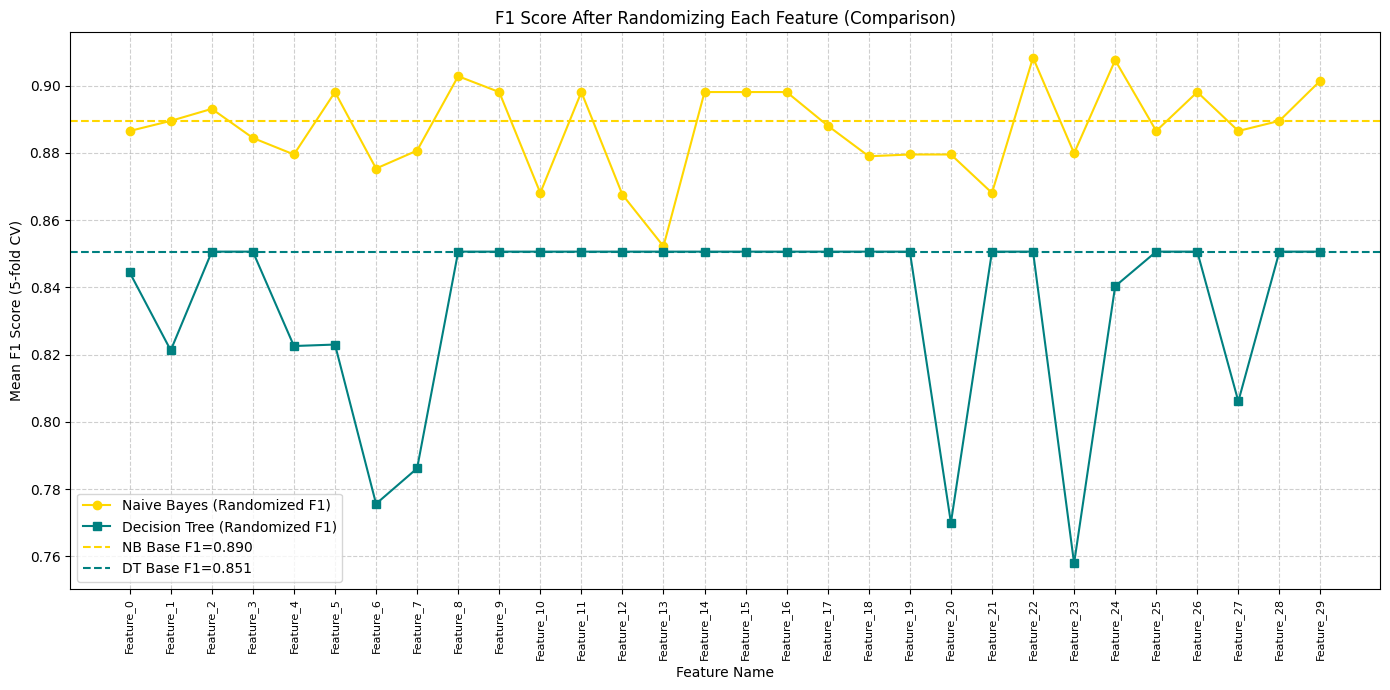

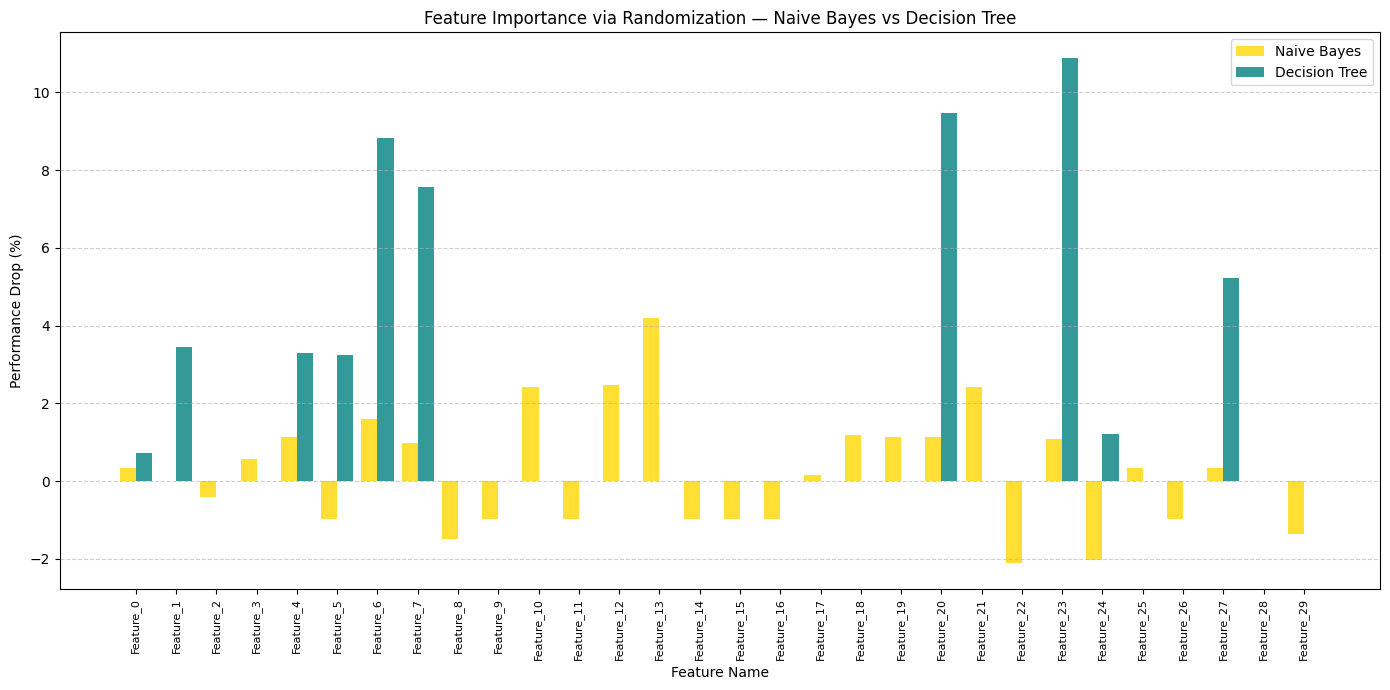

In [ ]:
# [YOUR PLOTTING CODE HERE]

#-----------------------------------------------------------
# Step 5: Plot F1 After Randomization
#-----------------------------------------------------------
plt.figure(figsize=(14,7))
plt.plot(rand_nb, label='Naive Bayes (Randomized F1)', marker='o', color='gold')
plt.plot(rand_dt, label='Decision Tree (Randomized F1)', marker='s', color='teal')
plt.axhline(base_nb, color='gold', linestyle='--', label=f'NB Base F1={base_nb:.3f}')
plt.axhline(base_dt, color='teal', linestyle='--', label=f'DT Base F1={base_dt:.3f}')
plt.xticks(ticks=np.arange(len(feature_names)), labels=feature_names, rotation=90, fontsize=8)
plt.xlabel("Feature Name")
plt.ylabel("Mean F1 Score (5-fold CV)")
plt.title("F1 Score After Randomizing Each Feature (Comparison)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#-----------------------------------------------------------
# Step 6: Plot Feature Importance (Performance Drop)
#-----------------------------------------------------------
plt.figure(figsize=(14,7))
width = 0.4
indices = np.arange(len(feature_names))

plt.bar(indices - width/2, drop_nb, width=width, label='Naive Bayes', color='gold', alpha=0.8)
plt.bar(indices + width/2, drop_dt, width=width, label='Decision Tree', color='teal', alpha=0.8)

plt.xticks(ticks=np.arange(len(feature_names)), labels=feature_names, rotation=90, fontsize=8)
plt.xlabel("Feature Name")
plt.ylabel("Performance Drop (%)")
plt.title("Feature Importance via Randomization — Naive Bayes vs Decision Tree")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Plot interpretation**
* Plot 1 :graph drops -> feature is important (because randomizing the feature drops the mean f1 score of the model)
* Plot 2: higher the bar -> feature is important
 
  **combined**
* 1. For DECISION TREE : {features - 23, 27, 20, 7, 6, 5, 1, 0} produces positive performance drop percentages
* 2. For NAIVE_BAYES : {features - 20, 13, 12, 7, 0, ..} produces positive performance drop percentages
* Positive drop % implies that the features are important for the model -> feature 20 seems to be important for both the model 
* However Naive_Bayes seems to be more robust towards feature selection and randomization. It has more stable F1 score.
* Naive_bayes performs better because it relies evenly on multiple features (no single feature dominates) whereas Decision_tree model is heavily dependent on few selective features.

In [ ]:
 #-------------------------------------
 # K-fold cross validation using our function cross_val_f1
 #------------------------------------

#----Step1----------------
# Check label types
print("Unique labels:", np.unique(y_fs))

# Auto-detect positive label
unique_labels = np.unique(y_fs)
if np.issubdtype(unique_labels.dtype, np.number):
    pos_label = np.max(unique_labels)     # usually 1 for numeric
else:
    pos_label = 'M' if 'M' in unique_labels else unique_labels[0]

print("Using positive label:", pos_label)

#---------Step 2: encode target --------------
y_fs_enc=label_encoder.fit_transform(y_fs)

#------Step 3: Baseline F1 scores: (no shuffle)-----
base_scores_nb = cross_val_f1(Gaussian_Naive_Bayes, X_fs, y_fs_enc,n_splits=5)
base_f1_nb = np.mean(base_scores_nb)
print(f" Baseline mean F1 (Naive Bayes): {base_f1_nb:.4f}")

base_scores_dt = cross_val_f1(Decision_Tree, X_fs, y_fs_enc)
base_f1_dt = np.mean(base_scores_dt)
print(f"Baseline mean F1 (Decision Tree): {base_f1_dt:.4f}")

#--------Step 4: Randomize one feature at a time---------
n_features = X_fs.shape[1]
rand_f1_nb = np.zeros(n_features)
rand_f1_dt = np.zeros(n_features)

for i in range(n_features):
    # Copy and shuffle one feature
    X_rand = X_fs.copy()
    np.random.shuffle(X_rand[:, i]) #s huffling feature_i = column_i

    # Compute mean F1 after randomization
    print("NB")
    rand_f1_nb[i] = np.mean(cross_val_f1(Gaussian_Naive_Bayes, X_rand, y_fs_enc))
    print("DT")
    rand_f1_dt[i] = np.mean(cross_val_f1(Decision_Tree, X_rand, y_fs_enc))

    print(f"Feature {i+1}/{n_features} randomized: {feature_names[i]}")


# -------Step 5: Compute percentage drop in F1 per feature:-------
drop_nb = (base_f1_nb - rand_f1_nb) / base_f1_nb * 100
drop_dt = (base_f1_dt - rand_f1_dt) / base_f1_dt * 100

#------- Step 6: Create feature-importance tables----------------
import pandas as pd
importance_nb = pd.DataFrame({
    "Feature": feature_names,
    "F1_Drop_%": drop_nb
}).sort_values("F1_Drop_%", ascending=False)

importance_dt = pd.DataFrame({
    "Feature": feature_names,
    "F1_Drop_%": drop_dt
}).sort_values("F1_Drop_%", ascending=False)

display(importance_nb.head(10))
display(importance_dt.head(10))



Unique labels: ['B' 'M']
Using positive label: M
Fold 1 F1 Score: 0.8571
Fold 2 F1 Score: 1.0000
Fold 3 F1 Score: 0.8571
Fold 4 F1 Score: 0.8000
Fold 5 F1 Score: 0.9333
Average F1 Score: 0.8895 ± 0.0696 
 
 Baseline mean F1 (Naive Bayes): 0.8895


/Users/sayantikanag/Documents/Code/python/data_sc/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 F1 Score: 0.8571
Fold 2 F1 Score: 0.9091
Fold 3 F1 Score: 0.8000
Fold 4 F1 Score: 0.8571
Fold 5 F1 Score: 0.8889
Fold 6 F1 Score: 1.0000
Fold 7 F1 Score: 0.5714
Fold 8 F1 Score: 1.0000
Fold 9 F1 Score: 0.8889
Fold 10 F1 Score: 0.8571
Average F1 Score: 0.8630 ± 0.1141 
 
Baseline mean F1 (Decision Tree): 0.8630
NB
Fold 1 F1 Score: 0.6667
Fold 2 F1 Score: 1.0000
Fold 3 F1 Score: 1.0000
Fold 4 F1 Score: 1.0000
Fold 5 F1 Score: 0.8000
Fold 6 F1 Score: 1.0000
Fold 7 F1 Score: 0.5000
Fold 8 F1 Score: 1.0000
Fold 9 F1 Score: 1.0000
Fold 10 F1 Score: 0.8571
Average F1 Score: 0.8824 ± 0.1683 
 
DT
Fold 1 F1 Score: 0.8571
Fold 2 F1 Score: 0.9091
Fold 3 F1 Score: 0.8000
Fold 4 F1 Score: 0.8571
Fold 5 F1 Score: 0.8889
Fold 6 F1 Score: 1.0000
Fold 7 F1 Score: 0.5714
Fold 8 F1 Score: 1.0000
Fold 9 F1 Score: 0.8889
Fold 10 F1 Score: 0.8571
Average F1 Score: 0.8630 ± 0.1141 
 
Feature 1/30 randomized: Feature_0
NB
Fold 1 F1 Score: 0.6667
Fold 2 F1 Score: 1.0000
Fold 3 F1 Score: 1.0000
Fold 4 F1

,Feature,F1_Drop_%
7,Feature_7,2.408994
22,Feature_22,1.605996
1,Feature_1,1.249108
21,Feature_21,1.249108
11,Feature_11,1.249108
0,Feature_0,0.802998
19,Feature_19,0.802998
8,Feature_8,0.802998
23,Feature_23,0.802998
25,Feature_25,0.802998


,Feature,F1_Drop_%
4,Feature_4,3.310815
23,Feature_23,2.317571
7,Feature_7,2.046686
0,Feature_0,0.000000
14,Feature_14,0.000000
28,Feature_28,0.000000
26,Feature_26,0.000000
25,Feature_25,0.000000
22,Feature_22,0.000000
21,Feature_21,0.000000


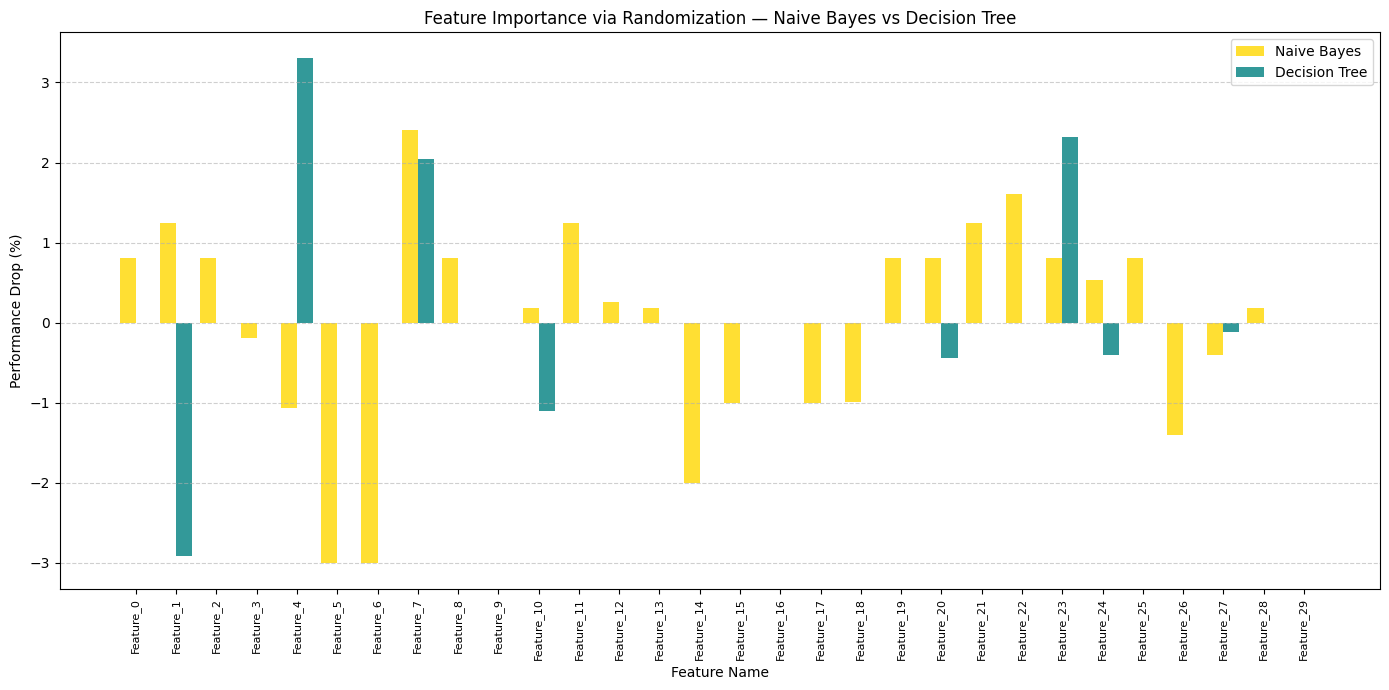

In [ ]:
#-----------------------------------------------------------
# Step 6: Plot Feature Importance (Performance Drop)
#-----------------------------------------------------------
plt.figure(figsize=(14,7))
width = 0.4
indices = np.arange(len(feature_names))

plt.bar(indices - width/2, drop_nb, width=width, label='Naive Bayes', color='gold', alpha=0.8)
plt.bar(indices + width/2, drop_dt, width=width, label='Decision Tree', color='teal', alpha=0.8)

plt.xticks(ticks=np.arange(len(feature_names)), labels=feature_names, rotation=90, fontsize=8)
plt.xlabel("Feature Name")
plt.ylabel("Performance Drop (%)")
plt.title("Feature Importance via Randomization — Naive Bayes vs Decision Tree")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Q4 - Data augmentation using SMOTE

In [ ]:
# [YOUR IMPLEMENTATION CODE HERE]

# Step 1----- Split into Majority and Minority Calss ----
y_fs_enc = label_encoder.fit_transform(y_fs)
X_minority = X_fs[y_fs_enc == 1]
X_majority = X_fs[y_fs_enc == 0]

#----Step 2: SMOTE function -----
from sklearn.neighbors import NearestNeighbors

def smote(X_minority, N=100, k=5):
    """
    SMOTE (Synthetic Minority Over-sampling Technique)
    Generates synthetic minority samples by interpolating between k-nearest neighbors.

    Parameters:
        X_minority: numpy array of minority class samples
        N: oversampling percentage (e.g., 100, 200, 300)
        k: number of nearest neighbors

    Returns:
        synthetic_samples: numpy array of generated samples
    """
    from sklearn.neighbors import NearestNeighbors

    n_samples, n_features = X_minority.shape

    # Adjust N if less than 100
    if N < 100:
        sample_size = int(n_samples * N / 100)
        X_minority = X_minority[np.random.choice(range(n_samples), size=sample_size, replace=False)]
        N = 100

    # Number of synthetic samples to generate per original sample
    N = int(N / 100)

    neigh = NearestNeighbors(n_neighbors=k+1)  # +1 to include the sample itself
    neigh.fit(X_minority)
    synthetic_samples = []

    for i in range(n_samples):
        # Get k nearest neighbors (excluding the sample itself)
        nn = neigh.kneighbors(X_minority[i].reshape(1, -1), return_distance=False)[0]
        nn = nn[nn != i]  # remove self

        for _ in range(N):
            if len(nn) == 0:
                continue
            nn_index = np.random.choice(nn)  # randomly pick one neighbor
            diff = X_minority[nn_index] - X_minority[i]
            gap = np.random.rand()
            synthetic = X_minority[i] + gap * diff
            synthetic_samples.append(synthetic)

    return np.array(synthetic_samples)


/Users/sayantikanag/Documents/Code/python/data_sc/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# -------Step 3: Apply SMOTE and evaluate models using Stratified K-Fold CV

oversample_rates = [100, 200, 300]
k_values = [1, 5]

results = {"Naive Bayes": {}, "Decision Tree": {}}

for k in k_values:
    nb_scores, dt_scores = [], []  # store F1 results for each oversampling rate

    for N in oversample_rates:
        # Generate synthetic minority samples
        X_syn = smote(X_minority, N=N, k=k)
        y_syn = np.ones(X_syn.shape[0])  # label = 1 for minority

        # Combine synthetic + real samples
        X_aug = np.vstack((X_majority, X_minority, X_syn))
        y_aug = np.hstack((
            np.zeros(X_majority.shape[0]),  # label 0 for majority
            np.ones(X_minority.shape[0] + X_syn.shape[0])  # label 1 for minority + synthetic
        ))

        # Initialize Stratified 5-Fold cross-validation
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        # ---------- Naive Bayes Evaluation ----------
        f1_scores_nb = []
        for train_idx, test_idx in skf.split(X_aug, y_aug):
            X_train, X_test = X_aug[train_idx], X_aug[test_idx]
            y_train, y_test = y_aug[train_idx], y_aug[test_idx]

            nb_model = Gaussian_Naive_Bayes()
            nb_model.fit(X_train, y_train)
            y_pred = nb_model.predict(X_test)

            f1 = f1_score(y_test, y_pred)
            f1_scores_nb.append(f1)

        f1_nb = np.mean(f1_scores_nb)  # mean F1 over 5 folds

        # ---------- Decision Tree Evaluation ----------
        f1_scores_dt = []
        for train_idx, test_idx in skf.split(X_aug, y_aug):
            X_train, X_test = X_aug[train_idx], X_aug[test_idx]
            y_train, y_test = y_aug[train_idx], y_aug[test_idx]

            dt_model = Decision_Tree()
            dt_model.fit(X_train, y_train)
            y_pred = dt_model.predict(X_test)

            f1 = f1_score(y_test, y_pred)
            f1_scores_dt.append(f1)

        f1_dt = np.mean(f1_scores_dt)

        # Store the mean scores
        nb_scores.append(f1_nb)
        dt_scores.append(f1_dt)

        print(f"[k={k}, N={N}%] Naive Bayes F1={f1_nb:.3f}, Decision Tree F1={f1_dt:.3f}")

    results["Naive Bayes"][k] = nb_scores
    results["Decision Tree"][k] = dt_scores


[k=1, N=100%] Naive Bayes F1=0.920, Decision Tree F1=0.899
[k=1, N=200%] Naive Bayes F1=0.925, Decision Tree F1=0.934
[k=1, N=300%] Naive Bayes F1=0.930, Decision Tree F1=0.962
[k=5, N=100%] Naive Bayes F1=0.915, Decision Tree F1=0.897
[k=5, N=200%] Naive Bayes F1=0.947, Decision Tree F1=0.950
[k=5, N=300%] Naive Bayes F1=0.951, Decision Tree F1=0.948


**Output Interpretation**
* We can observe that creating more synthetic data is actually improving the performance intially
* Naive Bayes consistently is doing better than Decision Tree at each step

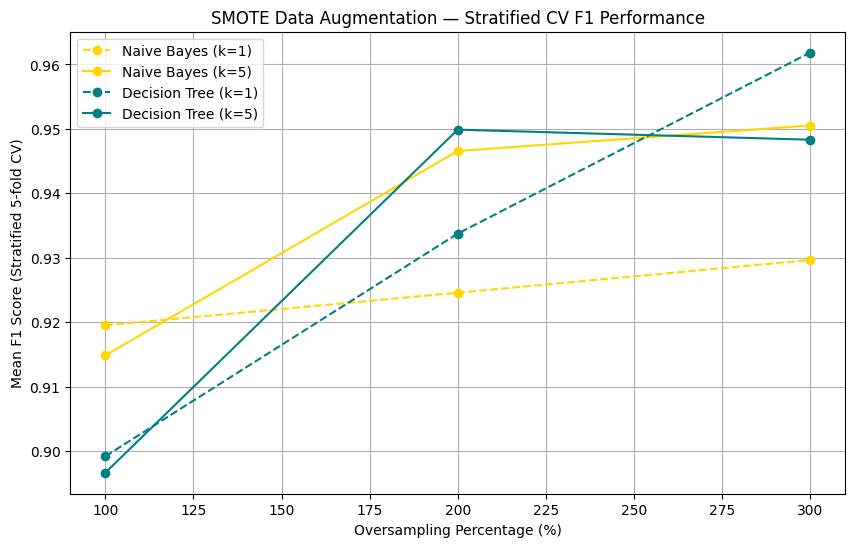

In [ ]:
# [YOUR PLOTTING CODE HERE]

plt.figure(figsize=(10,6))

for model_name, color in zip(["Naive Bayes", "Decision Tree"], ["gold", "teal"]):
    for k, linestyle in zip(k_values, ['--', '-']):
        plt.plot(oversample_rates, results[model_name][k],
                 marker='o', color=color, linestyle=linestyle,
                 label=f"{model_name} (k={k})")

plt.xlabel("Oversampling Percentage (%)")
plt.ylabel("Mean F1 Score (Stratified 5-fold CV)")
plt.title("SMOTE Data Augmentation — Stratified CV F1 Performance")
plt.legend()
plt.grid(True)
plt.show()

**Plot interpretation**
* when k=1 : the model is using 1 neighbour 
* when k=5 : the model is using 5 neighbours
* Oversampling includes more of synthetic data and thus produces more noise 
  * Thus, for k=5, oversampling reduces the f1 score
  * for k=1 it seems to get improved but ideally it will go down later.